# Computational astrophysics
# HW 1

In [1]:
# libraries imported 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import time
from tqdm import tqdm  # Import progress bar

%matplotlib widget
plt.style.use('/Users/dionysisgakis/.config/matplotlib/stylelib/publication.mplstyle') # plotting style, comment out if in another computer

## Problem 1

The integral analytically is:

$I = \int_1^5 x^{-3/2} dx = \left[ \frac{x^{-1/2}}{-1/2} \right]_1^5 = \left[-2x^{-1/2}\right]_1^5 = -2 \left( \frac{1}{\sqrt{5}} - 1 \right)= 1.10557$

Trapezoid's rule idea (to avoid twice as many function evaluations):

$I_{trap} = \sum_{i=1}^{N} \frac{f(x_i) + f(x_{i+1})}{2} \Delta x = \frac{f(a)+ f(a+\Delta x)}{2} + \frac{f(a+\Delta x)+ f(a+2\Delta x)}{2} + ... + \frac{f(b- 2\Delta x)+ f(b - \Delta x)}{2} + \frac{f(b-\Delta x)+ f(b)}{2} = \sum_{i=2}^{N-1} f(x_i) \Delta x -f(a)-f(b) $


Simpson's rule idea (first sum is for odd values of j and the second of even ones):

$I_{Simpson} =   \frac{\Delta x}{3} \left[ f(a) + f(b) + 4 \sum_{i=1}^{N/2} f(a + (2i - 1)\Delta x) + 2 \sum_{i=1}^{N/2-1} f(a + 2i \Delta x) \right]= \frac{\Delta x}{3} \left[ f(a) + f(b) + 4 \sum_{j=1,3,5,\dots}^{N-1} f(x_j) + 2 \sum_{j=2,4,6,\dots}^{N-2} f(x_j) \right]
$

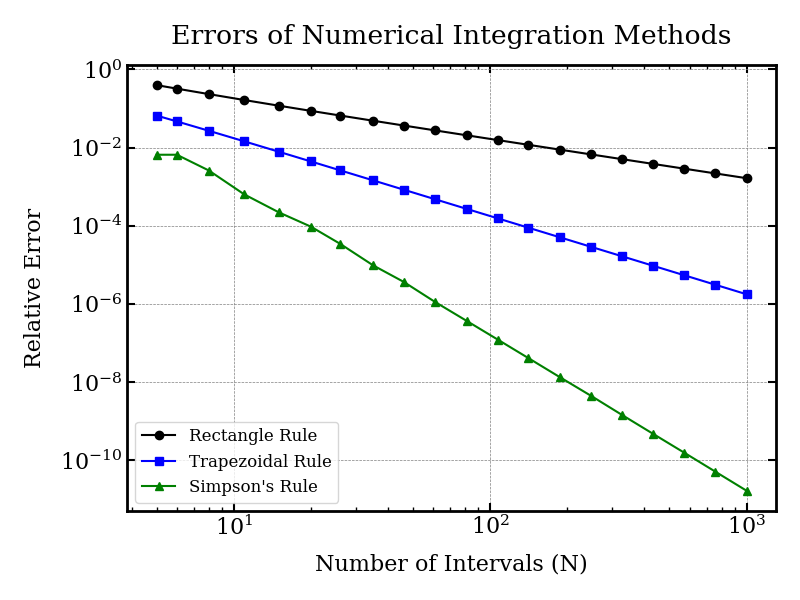

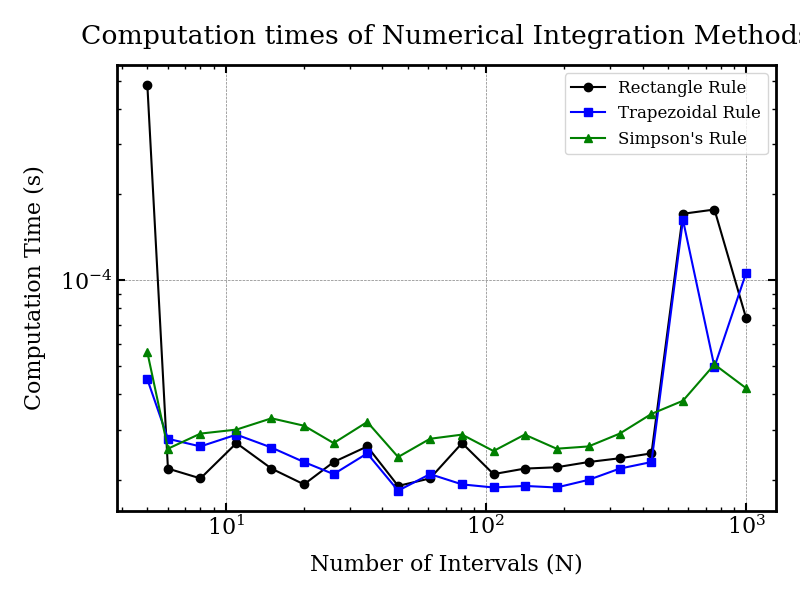

Number of intervals required for relative error < 10^-3:
  Rectangle: None
  Trapezoidal: 46
  Simpson: 11

Number of intervals required for relative error < 10^-5:
  Rectangle: None
  Trapezoidal: 433
  Simpson: 35


In [2]:
# Exact integral calculation
def exact_integral():
    return -2 * (1 / np.sqrt(5) - 1)

# Rectangle Rule
def rectangle_rule(f, a, b, N):
    dx = (b - a) / N
    x = np.linspace(a, b - dx, N)  
    return np.sum(f(x) * dx)

# Trapezoidal Rule
def trapezoidal_rule(f, a, b, N):
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    return dx * (np.sum(f(x)) - 0.5 * (f(a) + f(b)))

# Simpson's Rule
def simpsons_rule(f, a, b, N):
    if N % 2 == 1:
        N += 1  # Ensure N is even
    dx = (b - a) / N
    x = np.linspace(a, b, N + 1)
    return (dx / 3) * (f(a) + f(b) + 4 * np.sum(f(x[1:N:2])) + 2 * np.sum(f(x[2:N-1:2])))

# Function to integrate
def f(x):
    return 1 / x**(3/2)

a, b = 1, 5
exact_value = exact_integral()

N_values = np.logspace(np.log10(5), np.log10(1000), 20, dtype=int) 
errors_rect, times_rect = [], []
errors_trap, times_trap = [], []
errors_simp, times_simp = [], []

for N in N_values:
    # Rectangle rule
    start1 = time.time()
    I_rect = rectangle_rule(f, a, b, N)
    times_rect.append(time.time() - start1)
    errors_rect.append(abs(I_rect - exact_value) / exact_value)
    
    # Trapezoidal rule
    start2 = time.time()
    I_trap = trapezoidal_rule(f, a, b, N)
    times_trap.append(time.time() - start2)
    errors_trap.append(abs(I_trap - exact_value) / exact_value)
    
    # Simpson's rule
    start3 = time.time()
    I_simp = simpsons_rule(f, a, b, N)
    times_simp.append(time.time() - start3)
    errors_simp.append(abs(I_simp - exact_value) / exact_value)

# Plot Errors
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors_rect, label='Rectangle Rule', marker='o')
plt.loglog(N_values, errors_trap, label='Trapezoidal Rule', marker='s')
plt.loglog(N_values, errors_simp, label='Simpson\'s Rule', marker='^')
plt.xlabel('Number of Intervals (N)')
plt.ylabel('Relative Error')
plt.legend()
plt.title('Errors of Numerical Integration Methods')
plt.grid(True)
plt.show()

# Plot Computation Time
plt.figure(figsize=(8, 6))
plt.loglog(N_values, times_rect, label='Rectangle Rule', marker='o')
plt.loglog(N_values, times_trap, label='Trapezoidal Rule', marker='s')
plt.loglog(N_values, times_simp, label='Simpson\'s Rule', marker='^')
plt.xlabel('Number of Intervals (N)')
plt.ylabel('Computation Time (s)')
plt.legend()
plt.title('Computation times of Numerical Integration Methods')
plt.grid(True)
plt.show()

# Find required N for error thresholds
def find_N_for_error(errors, N_values, threshold):
    for i, err in enumerate(errors):
        if err < threshold:
            return int(N_values[i])  
    return None

N_10e3 = {"Rectangle": find_N_for_error(errors_rect, N_values, 1e-3),
          "Trapezoidal": find_N_for_error(errors_trap, N_values, 1e-3),
          "Simpson": find_N_for_error(errors_simp, N_values, 1e-3)}

N_10e5 = {"Rectangle": find_N_for_error(errors_rect, N_values, 1e-5),
          "Trapezoidal": find_N_for_error(errors_trap, N_values, 1e-5),
          "Simpson": find_N_for_error(errors_simp, N_values, 1e-5)}

# Print the results 
print("Number of intervals required for relative error < 10^-3:")
for method, value in N_10e3.items():
    print(f"  {method}: {value}")

print("\nNumber of intervals required for relative error < 10^-5:")
for method, value in N_10e5.items():
    print(f"  {method}: {value}")


For some reason the computational times vary a lot from iteration and iteration, but some general conclusions can still be drawn, i.e. that Simpson's rule appears the slowest compared to the other two which require almost identical times. In terms of accuracy, the most accurate method is Simpson's rule, followed by trapezoidal and finally the rectangle.

The rectangle rule cannot achieve accuracies of 10^-5.

## Problem 2

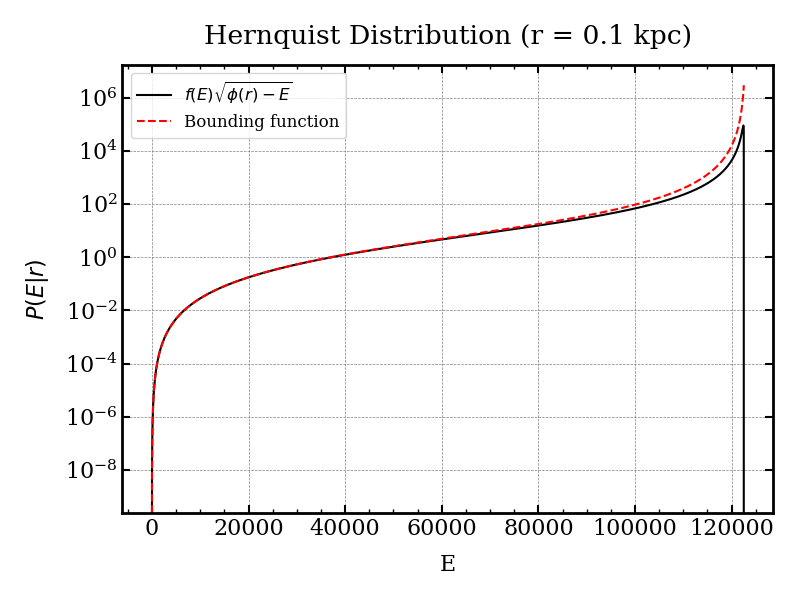

In [ ]:
# Constants
nptot = 10**6  # Total number of particles
mtot = 1e12  # Total mass of halo (M_sun)
aa = 35.0  # Hernquist scale radius (kpc)
gn = 4.30071e-6  # Newton's constant (kpc * (km/s)^2 / M_sun)

# Set random state for reproducibility
my_randState = np.random.RandomState(seed=8675309)

# Generate random radii rvals
randvs_r = my_randState.rand(nptot)
rvals = np.sort(1 / (randvs_r**(-0.5) - 1.))
rvals *= aa  # Scale with Hernquist radius

# Compute potential energy (E_max) at each r
phi_vals = gn * mtot / (rvals + aa)  # E_max = phi(r)

# Compute phi(r) for test radius
r_test = 0.1  # kpc
phi_r = gn * mtot / (r_test + aa)

# Function for f(E)
def f_test_E(E):
    q = np.sqrt(aa * E / (gn * mtot))
    u_g = np.sqrt(gn * mtot / aa)
    prefactor = mtot / (8 * np.sqrt(2) * np.pi**3 * aa**3 * u_g**3)
    factor = 1.0 / (1.0 - q**2)**(5./2.) * (3 * np.asin(q) + q * np.sqrt(1 - q**2) * (1 - 2*q**2) * (8*q**4 - 8*q**2 - 3))
    return prefactor * factor * np.sqrt(phi_r - E)

E_min = 0
E_max = phi_r
E_vals = np.linspace(E_min, E_max, 10000) 

# Compute q values and f(E)
q_vals = np.sqrt(aa * E_vals / (gn * mtot))
f_vals = f_test_E(E_vals)


# Define comparison function g_1(E)
def g_1(E,r):
    q = np.sqrt(aa * E / (gn * mtot))
    u_g = np.sqrt(gn * mtot / aa)
    prefactor = mtot / (8 * np.sqrt(2) * np.pi**3 * aa**3 * u_g**3)
    factor = 1.0 / (1.0 - q**2)**(5./2.) * (3 * np.asin(q) + q * np.sqrt(1 - q**2) * (1 - 2*q**2) * (8*q**4 - 8*q**2 - 3))
    phi_r = gn * mtot / (r + aa)
    return prefactor * factor * np.sqrt(phi_r) #* (1 - E / (2 * phi_r))

E_min = 0
E_max = phi_r
E_vals = np.linspace(E_min, E_max, 10000) 
g1_vals = g_1(E_vals,r_test)

# Plot the modified function and comparisons in log-linear scale
plt.figure(figsize=(8, 6))
plt.semilogy(E_vals, f_vals, label=r"$f(E) \sqrt{\phi(r) - E}$", color="black")
plt.semilogy(E_vals, g1_vals, linestyle="--", label="Bounding function", color="red")

# Labels and legend
plt.xlabel("E")
plt.ylabel(r"$P(E|r)$")
plt.title(f"Hernquist Distribution (r = {r_test:.1f} kpc)")
plt.legend()
plt.grid()
plt.show()


The bounding function is $\sqrt{\phi(r)}f(E)$, which is always above $P(E|r)$ since $\sqrt{\phi(r)} > \sqrt{\phi(r)-E}$. I tried plotting $P(E|r)$ and the bounding function for several values of radius, and they are particularly close for smaller values of radius. but as expected their convergence is getting worse for larger radii and energies.

In [18]:
def f_E(E,r):
    q = np.sqrt(aa * E / (gn * mtot))
    u_g = np.sqrt(gn * mtot / aa)
    prefactor = mtot / (8 * np.sqrt(2) * np.pi**3 * aa**3 * u_g**3)
    factor = 1.0 / (1.0 - q**2)**(5./2.) * (3 * np.asin(q) + q * np.sqrt(1 - q**2) * (1 - 2*q**2) * (8*q**4 - 8*q**2 - 3))
    phi_r = gn * mtot / (r + aa)
    return prefactor * factor * np.sqrt(phi_r - E)

# Initialize velocity array
velocities = np.zeros(nptot)

# Process each radius independently with progress bar
for i in tqdm(range(nptot), desc="Sampling velocities"):
    E_max = phi_vals[i]  # Maximum energy for this radius
    
    # Generate energy values from 0 to E_max
    E_vals = np.linspace(0, E_max, 10000)
    q_vals = np.sqrt(aa * E_vals / (gn * mtot))  # Compute q for f(E)
    f_vals = f_E(E_vals,rvals[i])

    # Compute g_1(E, r) values for comparison function at this specific radius
    g_vals_local = g_1(E_vals, rvals[i])  

    # Compute CDF of g_1(E, r) comparison function (numerical integration)
    CDF_vals = np.cumsum(g_vals_local) / np.sum(g_vals_local)  # Normalize to [0,1]

    # Sample a single E value using inverse transform sampling
    while True:
        rand_sample = np.random.rand()  # Random number in [0,1]
        sampled_E = np.interp(rand_sample, CDF_vals, E_vals)  # Interpolation to find corresponding E
        
        # Determine corresponding g_1(E, r) value at sampled E
        g_val_at_sampled_E = g_1(sampled_E, rvals[i])
        
        # Rejection sampling step
        test_val = np.random.uniform(0, 1) * g_val_at_sampled_E  # Sample from (0 to 1) times g(E, r)
        if test_val <= f_E(sampled_E,rvals[i]):  # Accept if below true PDF
            break  # Exit loop when accepted
    
    # Compute velocity
    velocities[i] = np.sqrt(2) * np.sqrt(phi_vals[i] - sampled_E)

print(len(velocities))
print(velocities)


Sampling velocities: 100%|██████████| 1000000/1000000 [13:35<00:00, 1225.89it/s]

1000000
[ 1.8123568  22.31353363 19.96187547 ...  0.2894308   0.2103565
  0.13368613]


/var/folders/s0/8wl018511k70vxwfv7yddl1w0000gp/T/ipykernel_6526/2093507470.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


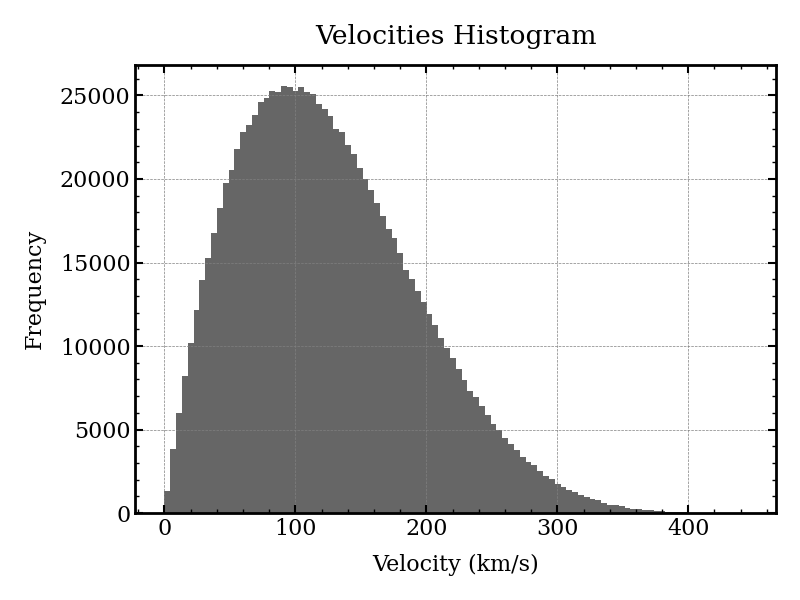

In [23]:
# Plot velocity distribution
plt.figure(figsize=(8, 6))
plt.hist(velocities, bins=100, alpha=0.6)  # Removed density=True to show frequency
plt.xlabel("Velocity (km/s)")
plt.ylabel("Frequency")
plt.title("Velocities Histogram")
plt.grid()
plt.show()

/var/folders/s0/8wl018511k70vxwfv7yddl1w0000gp/T/ipykernel_6526/1470126800.py:40: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((gn * mtot) / (12 * aa) * (term1 - term2))


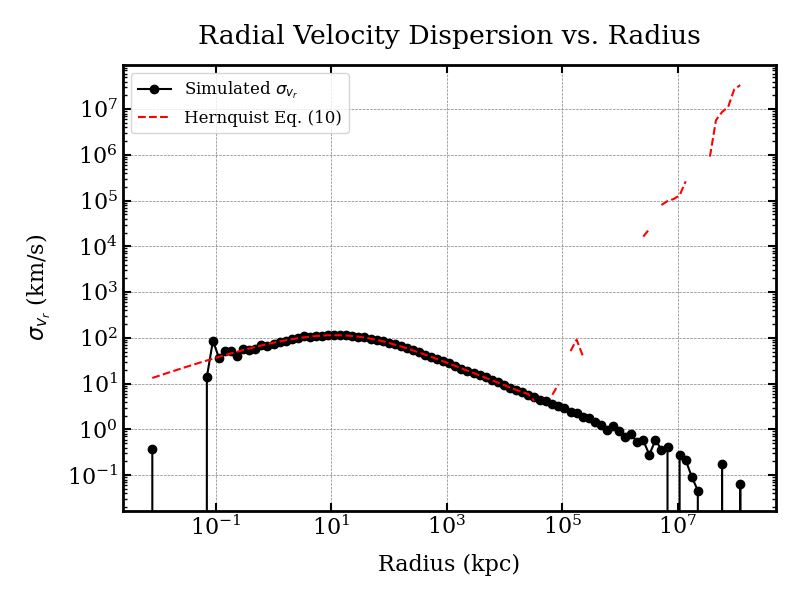

In [20]:
# Generate random velocity angles for spherical components
randvec_v = my_randState.rand(2, nptot)
phi_2 = 2.0 * np.pi * randvec_v[0]  # Random azimuthal angle for velocity
theta_2 = np.arccos(1.0 - 2.0 * randvec_v[1])  # Random polar angle for velocity

vr_vals = velocities * np.cos(theta_2)  # Radial velocity component
# not sure if above is correct or need the following

# Compute velocity components (cartesian coordinates)
vx_vals = velocities * np.cos(theta_2) * np.sin(phi_2)
vy_vals = velocities * np.sin(theta_2) * np.sin(phi_2)
vz_vals = velocities * np.cos(phi_2)

v_cart = np.array([vx_vals, vy_vals, vz_vals])

# Compute radial velocity component using the spherical unit vector
randvec_pos = my_randState.rand(2, nptot)
phi_1 = 2.0 * np.pi * randvec_pos[0]  # Random azimuthal angle for position
theta_1 = np.arccos(1.0 - 2.0 * randvec_pos[1])  # Random polar angle for position

r_unit = np.array([np.sin(theta_1) * np.cos(phi_1), np.sin(theta_1) * np.sin(phi_1), np.cos(theta_1)])

#vr_vals = np.dot(v_cart, r_unit)
vr_vals = (vx_vals * r_unit[0] + vy_vals * r_unit[1] + vz_vals * r_unit[2])

# Compute velocity dispersion in logarithmic radial bins
log_bins = np.logspace(np.log10(np.min(rvals)), np.log10(np.max(rvals)), num=100)
bin_centers = 0.5 * (log_bins[:-1] + log_bins[1:])
vr_dispersion = np.zeros(len(bin_centers))

for i in range(len(bin_centers)):
    mask = (rvals >= log_bins[i]) & (rvals < log_bins[i+1])
    if np.sum(mask) > 0:
        vr_dispersion[i] = np.sqrt(np.mean(vr_vals[mask]**2))

# Theoretical velocity dispersion from Hernquist 1990 Eq. (10)
def hernquist_vr_dispersion(r):
    term1 = (12 * r * (r + aa)**3 / aa**4) * np.log((r + aa) / r)
    term2 = (r / (r + aa)) * (25 + 52 * (r / aa) + 42 * (r / aa)**2 + 12 * (r / aa)**3)
    return np.sqrt((gn * mtot) / (12 * aa) * (term1 - term2))

hernquist_disp = hernquist_vr_dispersion(bin_centers)

# Plot velocity dispersion comparison
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, vr_dispersion, 'o-', label="Simulated $\sigma_{v_r}$")
plt.plot(bin_centers, hernquist_disp, 'r--', label="Hernquist Eq. (10)")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radius (kpc)")
plt.ylabel("$\sigma_{v_r}$ (km/s)")
plt.title("Radial Velocity Dispersion vs. Radius")
plt.legend()
plt.grid()
plt.show()

I don't know why the analytical expression "jumps" beyond 10^5 kpc, it might be an effect of large bins/numerican instability (but it seems that there's something wrong with the analytical expression). Also the simulated σ_r deviates from the analytical one for $\lessapprox 10^{-1}$ kpc (this also could be an effect of insufficient binning in the region). For intermediate values of radius though, the two results are in good agreement, which means that it efficiently selects velocities at these radii.

Overall, the code is not very efficient (the major part takes around 15 minutes), due to the fact that the bounding function is a few orders a magnitude larger than $P(E|r)$ for larger radii in the high energy regime. The slowest part is the acceptance/rejection part.

Computing $\sigma_{v_r}$ for radii:   0%|          | 0/1000000 [00:00<?, ?it/s]/var/folders/s0/8wl018511k70vxwfv7yddl1w0000gp/T/ipykernel_6526/875949518.py:64: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  integral, err = quad(integrand, r, r_max, args=(r,), epsabs=1e-6, epsrel=1e-6, limit=200)
Computing $\sigma_{v_r}$ for radii: 100%|██████████| 1000000/1000000 [08:40<00:00, 1923.02it/s]


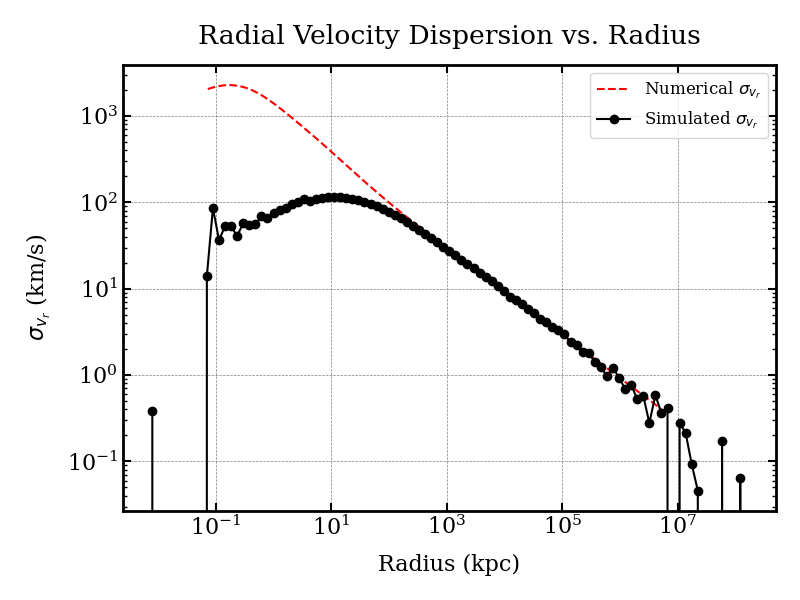

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from tqdm import tqdm  # Import tqdm for progress tracking

'''

# Generate random velocity angles for spherical components
randvec_v = my_randState.rand(2, nptot)
phi_2 = 2.0 * np.pi * randvec_v[0]  # Uniformly distributed azimuthal angle in [0, 2π]
theta_2 = np.arccos(1.0 - 2.0 * randvec_v[1])  # Uniformly sampled polar angle in [0, π]

vr_vals = velocities * np.cos(theta_2)  # Radial velocity component

# not sure if above is correct or need the following

# Compute velocity components (cartesian coordinates)
vx_vals = velocities * np.cos(theta_2) * np.sin(phi_2)
vy_vals = velocities * np.sin(theta_2) * np.sin(phi_2)
vz_vals = velocities * np.cos(phi_2)

v_cart = np.array([vx_vals, vy_vals, vz_vals])

# Compute radial velocity component using the spherical unit vector
randvec_pos = my_randState.rand(2, nptot)
phi_1 = 2.0 * np.pi * randvec_pos[0]  # Random azimuthal angle for position
theta_1 = np.arccos(1.0 - 2.0 * randvec_pos[1])  # Random polar angle for position

r_unit = np.array([np.sin(theta_1) * np.cos(phi_1), np.sin(theta_1) * np.sin(phi_1), np.cos(theta_1)])

#vr_vals = np.dot(v_cart, r_unit)
vr_vals = (vx_vals * r_unit[0] + vy_vals * r_unit[1] + vz_vals * r_unit[2])

# Compute velocity dispersion in logarithmic radial bins
log_bins = np.logspace(np.log10(np.min(rvals)), np.log10(np.max(rvals)), num=100)
bin_centers = 0.5 * (log_bins[:-1] + log_bins[1:])
vr_dispersion = np.zeros(len(bin_centers))

for i in range(len(bin_centers)):
    mask = (rvals >= log_bins[i]) & (rvals < log_bins[i+1])
    if np.sum(mask) > 0:
        vr_dispersion[i] = np.sqrt(np.mean(vr_vals[mask]**2))

'''


# Define the Hernquist density profile
def rho(r):
    return (mtot * aa) / (2 * np.pi * r) * (1 / (r + aa) ** 3)

# Define the integrand function for radial velocity dispersion
def integrand(rp, r):
    return (gn * mtot / rp**2) * rho(rp)

# Refined integral function for sigma_r^2 with a progress bar
def sigma_r_squared(r):
    if r < 0.01:  # Avoid very small r to prevent numerical instability
        return np.nan
    
    # Dynamically set upper integration limit
    r_max = max(0.01 * r, 10**7)  # Ensure meaningful range

    # Perform numerical integration
    integral, err = quad(integrand, r, r_max, args=(r,), epsabs=1e-6, epsrel=1e-6, limit=200)
    
    if integral <= 0 or np.isnan(integral):
        return np.nan  # Avoid invalid values
    
    return integral / rho(r)

# Define a wide range of radii (0.01 kpc to 10^7 kpc)
nptot = 10**6  # Total number of particles
mtot = 1e12  # Total mass of halo (M_sun)
aa = 35.0  # Hernquist scale radius (kpc)
gn = 4.30071e-6  # Newton's constant (kpc * (km/s)^2 / M_sun)

# Set random state for reproducibility
my_randState = np.random.RandomState(seed=8675309)

# Generate random radii rvals
randvs_r = my_randState.rand(nptot)
rvals1 = np.sort(1 / (randvs_r**(-0.5) - 1.))
rvals1 *= aa  # Scale with Hernquist radius

# Compute sigma_r for all radii with a progress bar
hernquist_disp = np.array([
    np.sqrt(sigma_r_squared(r)) if sigma_r_squared(r) > 0 else np.nan 
    for r in tqdm(rvals1, desc="Computing $\sigma_{v_r}$ for radii")
])



# Plot the velocity dispersion profile
plt.figure(figsize=(8, 6))
plt.plot(rvals1, hernquist_disp, 'r--', label="Numerical $\sigma_{v_r}$")
plt.plot(bin_centers, vr_dispersion, 'o-', label="Simulated $\sigma_{v_r}$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Radius (kpc)")
plt.ylabel("$\sigma_{v_r}$ (km/s)")
plt.title("Radial Velocity Dispersion vs. Radius")
plt.legend()
plt.grid()
plt.show()


If I calculate $\sigma_{v_r}$ numerically, it fixes the part of large radii (the "jump"), but messes up the small radii part.